In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_csv('Ratios_v2.csv')

/Users/danielxu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (4,8,11,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [70]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'RECORD', 'BBLE', 'B',
       'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL', 'TAXCLASS', 'LTFRONT',
       'LTDEPTH', 'EXT', 'STORIES', 'FULLVAL', 'AVLAND', 'AVTOT', 'EXLAND',
       'EXTOT', 'EXCD1', 'STADDR', 'ZIP', 'EXMPTCL', 'BLDFRONT', 'BLDDEPTH',
       'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2', 'EXCD2', 'PERIOD', 'YEAR',
       'VALTYPE', 'ZIP3', 'LOTAREA', 'BLDAREA', 'BLDVOL', 'R1', 'R2', 'R3',
       'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R1_by_ZIP', 'R2_by_ZIP',
       'R3_by_ZIP', 'R4_by_ZIP', 'R5_by_ZIP', 'R6_by_ZIP', 'R7_by_ZIP',
       'R8_by_ZIP', 'R9_by_ZIP', 'R1_by_ZIP3', 'R2_by_ZIP3', 'R3_by_ZIP3',
       'R4_by_ZIP3', 'R5_by_ZIP3', 'R6_by_ZIP3', 'R7_by_ZIP3', 'R8_by_ZIP3',
       'R9_by_ZIP3', 'R1_by_TAXCLASS', 'R2_by_TAXCLASS', 'R3_by_TAXCLASS',
       'R4_by_TAXCLASS', 'R5_by_TAXCLASS', 'R6_by_TAXCLASS', 'R7_by_TAXCLASS',
       'R8_by_TAXCLASS', 'R9_by_TAXCLASS', 'R1_by_B', 'R2_by_B', 'R3_by_B',
       'R4_by_B',

In [71]:
#df[['RECORD','R8_by_ZIP']]

In [72]:
# Get names of 45 columns
z_cols = []
for i in range(9):
    for j in ['ZIP', 'ZIP3', 'TAXCLASS', 'B', 'ALL']:
        z_cols.append(f'R{i+1}_by_{j}')

# First Z Scale Transformation

In [73]:
scaler = StandardScaler()
df1 = df[z_cols]
df1 = pd.DataFrame(scaler.fit_transform(df1), columns = z_cols)

In [74]:
df1.describe()

,R1_by_ZIP,R1_by_ZIP3,R1_by_TAXCLASS,R1_by_B,R1_by_ALL,R2_by_ZIP,R2_by_ZIP3,R2_by_TAXCLASS,R2_by_B,R2_by_ALL,...,R8_by_ZIP,R8_by_ZIP3,R8_by_TAXCLASS,R8_by_B,R8_by_ALL,R9_by_ZIP,R9_by_ZIP3,R9_by_TAXCLASS,R9_by_B,R9_by_ALL
count,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,...,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06
mean,2.864741e-17,-1.866228e-16,-7.279283e-16,-8.094439e-17,-2.885061e-16,-3.676936e-17,-9.343401e-17,1.091616e-16,-7.330473e-17,4.861229e-18,...,1.500720e-17,-6.233930e-17,1.257546e-16,-3.837954e-17,-7.695321e-17,1.225746e-17,5.228699e-18,1.964247e-16,6.398359e-17,-1.341040e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.251682e-01,-3.391482e-02,-2.940229e-02,-3.281839e-02,-1.306281e-02,-3.070972e-02,-5.179668e-03,-1.663087e-02,-5.209348e-03,-2.115784e-03,...,-2.397555e-02,-4.549727e-03,-1.692238e-02,-4.269783e-03,-1.721713e-03,-2.404176e-02,-4.548568e-03,-1.660108e-02,-4.269325e-03,-1.715946e-03
25%,-7.249414e-02,-3.195729e-02,-2.739914e-02,-3.069569e-02,-1.275809e-02,-3.070809e-02,-5.179663e-03,-1.633015e-02,-5.209342e-03,-2.115781e-03,...,-2.397502e-02,-4.549726e-03,-1.668038e-02,-4.269782e-03,-1.721713e-03,-2.404145e-02,-4.548568e-03,-1.647222e-02,-4.269324e-03,-1.715946e-03
50%,-2.299195e-02,-2.580181e-02,-1.192494e-02,-2.643781e-02,-1.256105e-02,-3.070284e-02,-5.179576e-03,-6.295322e-03,-5.209328e-03,-2.115780e-03,...,-2.397274e-02,-4.549692e-03,-5.151609e-03,-4.269780e-03,-1.721713e-03,-2.403990e-02,-4.548530e-03,-5.615668e-03,-4.269323e-03,-1.715946e-03
75%,1.735076e-02,-1.755640e-02,-6.310988e-04,-2.073851e-02,-1.226202e-02,-3.067704e-02,-5.179276e-03,-2.271092e-03,-5.209130e-03,-2.115778e-03,...,-2.396168e-02,-4.549504e-03,-5.633552e-04,-4.269701e-03,-1.721712e-03,-2.402974e-02,-4.548339e-03,-1.098735e-03,-4.269156e-03,-1.715946e-03
max,6.086337e+02,5.253550e+02,8.892068e+02,5.136450e+02,9.123155e+02,3.954853e+02,8.383068e+02,8.768793e+02,8.434519e+02,9.086624e+02,...,3.939456e+02,8.509192e+02,8.942170e+02,7.988861e+02,9.094108e+02,3.949963e+02,8.509228e+02,8.799040e+02,7.990072e+02,9.094111e+02


# PCA

In [75]:
pca = PCA()
matrix = df1
pca.fit(matrix)
pca_samples = pca.transform(matrix)

Text(0.5, 0, 'Principal components')

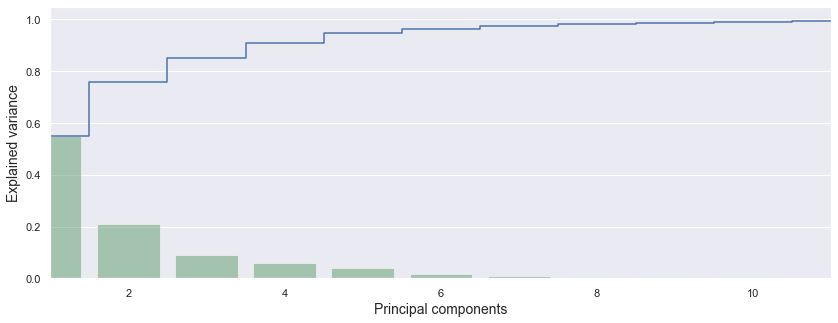

In [76]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)
plt.step(range(matrix.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
sns.barplot(np.arange(1,matrix.shape[1]+1), pca.explained_variance_ratio_, alpha=0.5, color = 'g',
            label='individual explained variance')
plt.xlim(0, 10)

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
#plt.legend(loc='upper left', fontsize = 13);

In [77]:
df1 = pd.DataFrame(pca_samples).iloc[:,0:5]

In [78]:
df1.describe()

,0,1,2,3,4
count,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06
mean,1.965789e-16,-7.559224e-17,1.355249e-16,1.783811e-16,-2.391769e-16
std,4.978233e+00,3.069714e+00,2.009055e+00,1.631337e+00,1.346406e+00
min,-7.177072e-02,-1.387311e+02,-3.335492e+02,-7.873194e+02,-5.030274e+02
25%,-5.242100e-02,-7.904188e-02,-5.741904e-02,-6.347489e-02,-2.788832e-02
50%,-4.247382e-02,-5.785713e-02,-5.261466e-02,-3.396435e-02,-1.715993e-03
75%,-3.456113e-02,-3.795881e-02,-4.573833e-02,-6.270454e-03,2.753753e-02
max,4.379173e+03,2.295241e+03,7.993188e+02,9.840246e+02,7.756734e+02


In [79]:
pca = PCA(n_components=5)
matrix_5D = pca.fit_transform(df1)
mat = pd.DataFrame(matrix_5D)

In [80]:
mat.describe()

,0,1,2,3,4
count,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06
mean,7.745786e-18,-2.547273e-17,6.297726e-18,-4.814230e-17,-5.576479e-19
std,4.978233e+00,3.069714e+00,2.009055e+00,1.631337e+00,1.346406e+00
min,-7.177072e-02,-1.387311e+02,-3.335492e+02,-7.873194e+02,-5.030274e+02
25%,-5.242100e-02,-7.904188e-02,-5.741904e-02,-6.347489e-02,-2.788832e-02
50%,-4.247382e-02,-5.785713e-02,-5.261466e-02,-3.396435e-02,-1.715993e-03
75%,-3.456113e-02,-3.795881e-02,-4.573833e-02,-6.270454e-03,2.753753e-02
max,4.379173e+03,2.295241e+03,7.993188e+02,9.840246e+02,7.756734e+02


In [81]:
pca = PCA(5)
x_pca = pca.fit_transform(df1)
x_pca = pd.DataFrame(x_pca)
x_pca.columns=['PC1','PC2','PC3','PC4','PC5']
x_pca.describe()

,PC1,PC2,PC3,PC4,PC5
count,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06
mean,7.745786e-18,-2.547273e-17,6.297726e-18,-4.814230e-17,-5.576479e-19
std,4.978233e+00,3.069714e+00,2.009055e+00,1.631337e+00,1.346406e+00
min,-7.177072e-02,-1.387311e+02,-3.335492e+02,-7.873194e+02,-5.030274e+02
25%,-5.242100e-02,-7.904188e-02,-5.741904e-02,-6.347489e-02,-2.788832e-02
50%,-4.247382e-02,-5.785713e-02,-5.261466e-02,-3.396435e-02,-1.715993e-03
75%,-3.456113e-02,-3.795881e-02,-4.573833e-02,-6.270454e-03,2.753753e-02
max,4.379173e+03,2.295241e+03,7.993188e+02,9.840246e+02,7.756734e+02


# Second Z Scale Transformation

In [82]:
df1 = pd.DataFrame(scaler.fit_transform(df1))

In [83]:
df1.describe()

,0,1,2,3,4
count,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06
mean,-3.177832e-17,9.173790e-17,-2.978080e-17,9.229316e-17,4.771719e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.441691e-02,-4.519352e+01,-1.660230e+02,-4.826224e+02,-3.736077e+02
25%,-1.053005e-02,-2.574896e-02,-2.858014e-02,-3.890975e-02,-2.071317e-02
50%,-8.531910e-03,-1.884774e-02,-2.618878e-02,-2.081996e-02,-1.274499e-03
75%,-6.942451e-03,-1.236559e-02,-2.276611e-02,-3.843753e-03,2.045262e-02
max,8.796644e+02,7.477055e+02,3.978584e+02,6.032016e+02,5.761068e+02


# Normalize Score 1

In [84]:
df1['score'] = (abs(df1[0])**2+abs(df1[1])**2+abs(df1[2])**2+abs(df1[3])**2+abs(df1[4])**2)**(1/2)

In [85]:
df1['RECORD'] = df['RECORD']

In [86]:
df1.head()

,0,1,2,3,4,score,RECORD
0,-0.014118,-0.035250,-0.018085,-0.057771,0.043979,0.083908,1
1,0.066403,0.255662,-0.174987,1.219237,-1.297856,1.808690,2
2,-0.013077,-0.031760,-0.020692,-0.042738,0.027369,0.064679,3
3,-0.013936,-0.034337,-0.019152,-0.053920,0.039657,0.078867,4
4,-0.009362,-0.024893,-0.019999,-0.012066,-0.006431,0.035975,5


In [87]:
df1 = df1.sort_values('score', ascending = True)
df1.tail()

,0,1,2,3,4,score,RECORD
337274,6.483405,231.231872,3.147289,207.558807,476.786788,569.145341,337275
337273,7.837106,279.412184,3.806797,250.812324,576.106813,687.715757,337274
776305,37.912128,200.832368,-64.777370,603.201627,-356.593788,732.788107,776306
565391,879.664411,-12.364286,-166.023046,46.702616,-61.093767,898.576422,565392
7055,15.375723,747.705518,50.740410,-482.622439,-154.755576,904.847087,7056


In [88]:
df1.reset_index(inplace=True)
df1['SCORE_1'] = df1.index

In [89]:
df1.head()

,index,0,1,2,3,4,score,RECORD,SCORE_1
0,968636,-0.001136,-0.014272,-0.001859,0.002333,0.003105,0.014951,968637,0
1,968635,-0.003063,-0.014585,-0.006294,0.000910,0.003880,0.016661,968636,1
2,985604,0.003886,-0.014391,0.010375,0.003501,0.002920,0.018725,985605,2
3,968649,0.002775,-0.009926,0.004439,0.015311,-0.005743,0.019833,968650,3
4,985148,0.004683,-0.012159,0.012024,0.008523,-0.002848,0.019877,985149,4


In [90]:
df1 = df1.sort_values('RECORD')
df1.reset_index(inplace=True)
df1.head()

,level_0,index,0,1,2,3,4,score,RECORD,SCORE_1
0,899366,0,-0.014118,-0.035250,-0.018085,-0.057771,0.043979,0.083908,1,899366
1,1063994,1,0.066403,0.255662,-0.174987,1.219237,-1.297856,1.808690,2,1063994
2,746414,2,-0.013077,-0.031760,-0.020692,-0.042738,0.027369,0.064679,3,746414
3,847484,3,-0.013936,-0.034337,-0.019152,-0.053920,0.039657,0.078867,4,847484
4,64497,4,-0.009362,-0.024893,-0.019999,-0.012066,-0.006431,0.035975,5,64497


# Add Rank Ordered Score 1 Back to Original Data
- Score_1 = 0 means smallest outlier

In [91]:
df['SCORE_1'] = df1['SCORE_1']
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,...,R1_by_ALL,R2_by_ALL,R3_by_ALL,R4_by_ALL,R5_by_ALL,R6_by_ALL,R7_by_ALL,R8_by_ALL,R9_by_ALL,SCORE_1
0,0,0,0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,...,0.008662,5.980538e-05,1.721391e-05,0.018111,3.227784e-05,9.252514e-06,0.009562,7.355430e-05,2.108615e-05,899366
1,1,1,1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,...,6.362706,3.843280e-05,2.833001e-06,4.975162,7.756893e-06,5.694407e-07,7.024352,4.726828e-05,3.470280e-06,1063994
2,2,2,2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,...,0.055418,8.047898e-07,2.702517e-07,0.218676,8.197006e-07,2.741304e-07,0.061181,9.898064e-07,3.310444e-07,746414
3,3,3,3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,...,0.018991,2.572970e-06,1.296021e-06,0.078262,2.736912e-06,1.372948e-06,0.020966,3.164481e-06,1.587559e-06,847484
4,4,4,4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,...,0.141632,1.650068e-04,1.662299e-04,0.666741,2.005021e-04,2.011603e-04,0.156360,2.029410e-04,2.036231e-04,64497


# Add and Normalize Score 2

In [92]:
df_scott = pd.read_csv('result_scott.csv')

In [93]:
df_scott['RECORD'] = df['RECORD']
df_scott = df_scott.iloc[:,1:]
df_scott.columns = ['SCORE', 'RECORD']
df_scott.head()

,SCORE,RECORD
0,0.083930,1
1,1.808695,2
2,0.064710,3
3,0.078891,4
4,0.036030,5


In [94]:
df_scott = df_scott.sort_values('SCORE', ascending = True)
df_scott.tail()

,SCORE,RECORD
337274,569.145287,337275
337273,687.715703,337274
776305,732.788094,776306
565391,898.576426,565392
7055,904.847100,7056


In [95]:
df_scott.reset_index(inplace=True)
df_scott['SCORE_1'] = df_scott.index
df_scott.head()

,index,SCORE,RECORD,SCORE_1
0,968636,0.014956,968637,0
1,968635,0.016679,968636,1
2,985604,0.018699,985605,2
3,968649,0.019812,968650,3
4,985148,0.019849,985149,4


In [96]:
df_scott = df_scott.sort_values('RECORD')
df_scott.reset_index(inplace=True)
df_scott.head()

,level_0,index,SCORE,RECORD,SCORE_1
0,899358,0,0.083930,1,899358
1,1063994,1,1.808695,2,1063994
2,746395,2,0.064710,3,746395
3,847501,3,0.078891,4,847501
4,64544,4,0.036030,5,64544


# Final Results
- We just look at the top 10 SCORE_COMBINED with the highest Fraud Score, those are the ones we will investigate

In [97]:
df['SCORE_2'] = df_scott['SCORE_1']
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,...,R2_by_ALL,R3_by_ALL,R4_by_ALL,R5_by_ALL,R6_by_ALL,R7_by_ALL,R8_by_ALL,R9_by_ALL,SCORE_1,SCORE_2
0,0,0,0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,...,5.980538e-05,1.721391e-05,0.018111,3.227784e-05,9.252514e-06,0.009562,7.355430e-05,2.108615e-05,899366,899358
1,1,1,1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,...,3.843280e-05,2.833001e-06,4.975162,7.756893e-06,5.694407e-07,7.024352,4.726828e-05,3.470280e-06,1063994,1063994
2,2,2,2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,...,8.047898e-07,2.702517e-07,0.218676,8.197006e-07,2.741304e-07,0.061181,9.898064e-07,3.310444e-07,746414,746395
3,3,3,3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,...,2.572970e-06,1.296021e-06,0.078262,2.736912e-06,1.372948e-06,0.020966,3.164481e-06,1.587559e-06,847484,847501
4,4,4,4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,...,1.650068e-04,1.662299e-04,0.666741,2.005021e-04,2.011603e-04,0.156360,2.029410e-04,2.036231e-04,64497,64544


In [98]:
df['SCORE_COMBINED'] = df['SCORE_1'] + df['SCORE_2']
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,...,R3_by_ALL,R4_by_ALL,R5_by_ALL,R6_by_ALL,R7_by_ALL,R8_by_ALL,R9_by_ALL,SCORE_1,SCORE_2,SCORE_COMBINED
0,0,0,0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,...,1.721391e-05,0.018111,3.227784e-05,9.252514e-06,0.009562,7.355430e-05,2.108615e-05,899366,899358,1798724
1,1,1,1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,...,2.833001e-06,4.975162,7.756893e-06,5.694407e-07,7.024352,4.726828e-05,3.470280e-06,1063994,1063994,2127988
2,2,2,2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,...,2.702517e-07,0.218676,8.197006e-07,2.741304e-07,0.061181,9.898064e-07,3.310444e-07,746414,746395,1492809
3,3,3,3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,...,1.296021e-06,0.078262,2.736912e-06,1.372948e-06,0.020966,3.164481e-06,1.587559e-06,847484,847501,1694985
4,4,4,4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,...,1.662299e-04,0.666741,2.005021e-04,2.011603e-04,0.156360,2.029410e-04,2.036231e-04,64497,64544,129041


In [102]:
df.sort_values('SCORE_COMBINED', ascending=False).head(10)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,...,R3_by_ALL,R4_by_ALL,R5_by_ALL,R6_by_ALL,R7_by_ALL,R8_by_ALL,R9_by_ALL,SCORE_1,SCORE_2,SCORE_COMBINED
7055,7055,7055,7055,7056,1000621001,1,62,1001,NaN,BROOKFIELD PROPERTIES,...,1.560125e-06,92119.218498,0.000028,5.289707e-07,77104.368888,0.000103,0.000002,1070993,1070993,2141986
565391,565391,565391,565391,565392,3085900700,3,8590,700,NaN,U S GOVERNMENT OWNRD,...,4.326529e+05,345.370756,528256.397662,5.299904e+05,80.012522,528202.120930,529977.483209,1070992,1070992,2141984
776305,776305,776305,776305,776306,4080100001,4,8010,1,NaN,TONY CHEN,...,6.700097e-04,1544.380012,0.000748,7.502828e-04,391.391292,0.000818,0.000821,1070991,1070991,2141982
337273,337273,337273,337273,337274,3021111001,3,2111,1001,NaN,ONE HANSON PLACE COND,...,2.556660e-06,1464.195035,0.000016,3.898935e-07,2724.750903,0.000128,0.000003,1070990,1070990,2141980
337274,337274,337274,337274,337275,3021111002,3,2111,1002,NaN,HANSON PLACE PARTNERS,...,2.115860e-06,1211.749396,0.000013,3.226710e-07,2254.969831,0.000106,0.000003,1070989,1070989,2141978
750815,750815,750815,750815,750816,4066610005E,4,6661,5,E,M FLAUM,...,2.838960e+01,907.030404,22.309833,2.238307e+01,210.136159,22.307877,22.382857,1070988,1070988,2141976
565397,565397,565397,565397,565398,3085910100,3,8591,100,NaN,DEPT OF GENERAL SERVI,...,2.311004e+05,4.957689,282166.821277,2.830931e+05,1.148555,282137.829497,283086.134777,1070987,1070987,2141974
1053358,1053358,1053358,1053358,1053359,5063730001,5,6373,1,NaN,PARKS AND RECREATION,...,2.151269e+01,2.739923,71.355777,2.635258e+01,0.634762,71.348445,26.351935,1070986,1070986,2141972
378984,378984,378984,378984,378985,3037711002,3,3771,1002,NaN,NaN,...,9.351290e-03,1068.025625,0.016182,2.319257e-03,1222.095515,0.079915,0.011455,1070985,1070985,2141970
6836,6836,6836,6836,6837,1000471001,1,47,1001,NaN,120 BROADWAY HOLDINGS,...,8.276241e-07,36616.839538,0.000013,3.099123e-07,27750.831148,0.000041,0.000001,1070984,1070984,2141968
